# **PREDICTION DU NIVEAU D'ENGAGEMENT DES JOUEURS EN LIGNE**

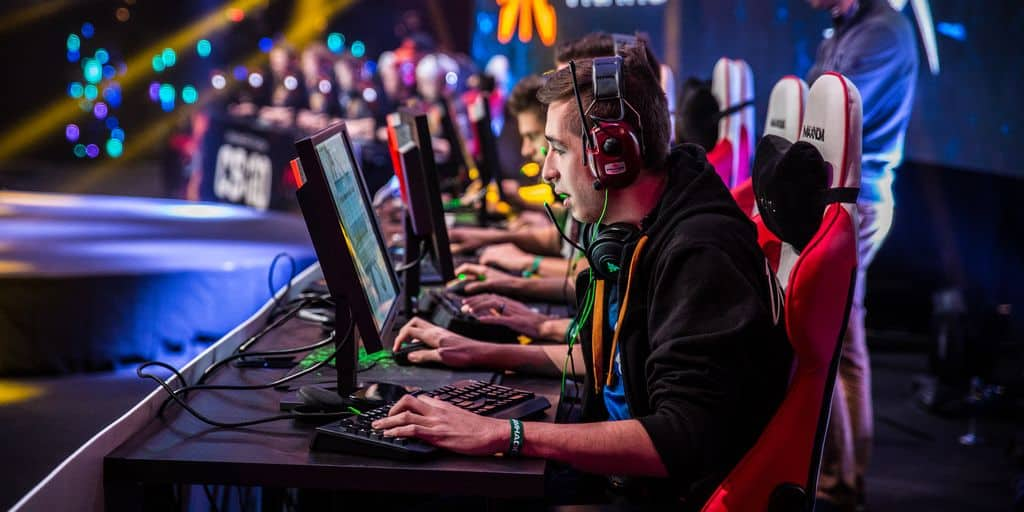

**Etudiants:** <br>
- BAH Amadou Ali
- AKADJE Leon Jean Frederic

## **Contexte du Projet**
Avec la croissance exponentielle de l'industrie des jeux en ligne, comprendre et prédire le niveau d'engagement des joueurs est devenu crucial pour les développeurs de **jeux** et **les entreprises de jeux** . La capacité à **anticiper les comportements des joueurs** aidera à améliorer l'expérience utilisateur, à **accroître l'engagement des joueur** et **optimiser les stratégies de monétisation**.

## **Objectifs du Projet**
**Construire un modèle ML capable de prédir le niveau d'engagement des joueurs en ligne en fonction de leurs caractéristiques démographiques et comportementales.**

*En résumé, il vise à exploiter les données disponibles pour comprendre et prédire les performances des joueurs en ligne, avec un focus particulier sur le niveau d'engagement, en utilisant des techniques avancées d'analyse de données et de modélisation prédictive.*

## import package

In [2]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


# data manipulation
import pandas as pd
import numpy as np

# data visualization
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from IPython.display import display
import os
sns.set()

# filter warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Chargement des données

In [3]:
path = "donnees soring de la performance joueur en ligne.txt"
df= pd.read_csv(path,sep='\t')

In [4]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43.0,Male,Other,Strategy,16.271119,0,Medium,6.0,108.0,79.0,25.0,Medium
1,9001,29.0,Female,USA,Strategy,5.525961,0,Medium,5.0,144.0,11.0,10.0,Medium
2,9002,22.0,Female,USA,Sports,8.223755,0,Easy,NaN,142.0,35.0,41.0,High
3,9003,35.0,Male,USA,Action,5.265351,1,Easy,9.0,85.0,57.0,47.0,Medium
4,9004,33.0,Male,Europe,Action,15.531945,0,Medium,2.0,131.0,95.0,37.0,Medium


#### Description des Données

In [5]:
print("Nombre de ligne de la base : ", df.shape[0])
print("Nombre de colonne de la base : " ,df.shape[1])

Nombre de ligne de la base :  29710
Nombre de colonne de la base :  13


In [6]:
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [7]:
df.dtypes , df.count()

(PlayerID                       int64
 Age                          float64
 Gender                        object
 Location                      object
 GameGenre                     object
 PlayTimeHours                float64
 InGamePurchases                int64
 GameDifficulty                object
 SessionsPerWeek              float64
 AvgSessionDurationMinutes    float64
 PlayerLevel                  float64
 AchievementsUnlocked         float64
 EngagementLevel               object
 dtype: object,
 PlayerID                     29710
 Age                          29696
 Gender                       29710
 Location                     29710
 GameGenre                    29710
 PlayTimeHours                29710
 InGamePurchases              29710
 GameDifficulty               29710
 SessionsPerWeek              29704
 AvgSessionDurationMinutes    29707
 PlayerLevel                  29706
 AchievementsUnlocked         29705
 EngagementLevel              29710
 dtype: int64)

In [8]:
# Niveau d'engagement
print("les proportions d'engagement :")
df["EngagementLevel"].value_counts(normalize=True)

les proportions d'engagement :


EngagementLevel
Medium    0.652104
High      0.347896
Name: proportion, dtype: float64

### Data Processing

Deux datasets format de dataset seront proposés afin de voir lequel permet de discriminer au mieux la variable cible. <br>
Il s'agit : <br>
- le dataset éclaté par le processus *dummies* (dataset : `data_complet`) ; <br>
- le dataset dont les modalités des variables catégorielles sont remplacés par leur proportion respective (dataset : `data_modFreq`). <br>

#### Traitement des valeurs manquantes

In [9]:
#Donnée Manquantes
df.isnull().sum()

PlayerID                      0
Age                          14
Gender                        0
Location                      0
GameGenre                     0
PlayTimeHours                 0
InGamePurchases               0
GameDifficulty                0
SessionsPerWeek               6
AvgSessionDurationMinutes     3
PlayerLevel                   4
AchievementsUnlocked          5
EngagementLevel               0
dtype: int64

Les valeurs manquantes de notre jeu de données sont principalement de type numérique. <br>
Une *imputation* de ces valeurs manquantes est alors faite par leurs *médianes* respectives.

In [10]:
#Imputation des valeur manquantes 

def Imput_ValeurManquate(data, columns_num, imput_num="median"):
    for col in columns_num:
        if data[col].isnull().any():  # Vérifier s'il y a des valeurs manquantes
            if imput_num == "median":
                change = np.median(data[col].dropna())
            else:
                change = int(imput_num)
            data[col].fillna(change, inplace=True)
    return data 
    

In [50]:
data_complet = df.copy() # Conservation de notre jeu de données
data_complet=data_complet.set_index('PlayerID')
data_ref = data_complet.copy()# Jeu de données qui servira à l'introduction d'autres datasets
data_complet = Imput_ValeurManquate(df, ["Age","SessionsPerWeek","AvgSessionDurationMinutes","PlayerLevel","AchievementsUnlocked"])
assert list(data_complet.isnull().sum() ) == [0]*data_complet .shape[1]

In [12]:
# Vérification Données Manquantes
data_complet.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [13]:
data_complet.describe()


,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,29710.000000,29710.000000,29710.000000,29710.000000,29710.000000,29710.000000,29710.000000,29710.000000
mean,28989.980310,32.026759,11.996375,0.202087,11.188657,104.490172,50.889667,25.174150
std,11560.994353,10.047790,6.924218,0.401563,5.012555,45.294409,28.599737,14.454653
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19001.250000,23.000000,6.028191,0.000000,7.000000,67.000000,26.000000,13.000000
50%,28993.500000,32.000000,11.991068,0.000000,11.000000,107.000000,51.000000,26.000000
75%,39003.500000,41.000000,17.942027,0.000000,16.000000,143.000000,76.000000,38.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


#### Dataset avec dummies

In [51]:
# 2. Identification des colonnes catégorielles
categorical_columns = data_complet.select_dtypes(include=['object']).columns

df_complet= pd.get_dummies(data_complet, columns=categorical_columns, drop_first=True).astype(int)
df_complet.head()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,Gender_Male,Location_Europe,Location_Other,Location_USA,GameGenre_RPG,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,GameDifficulty_Hard,GameDifficulty_Medium,EngagementLevel_Medium
0,9000,43,16,0,6,108,79,25,1,0,1,0,0,0,0,1,0,1,1
1,9001,29,5,0,5,144,11,10,0,0,0,1,0,0,0,1,0,1,1
2,9002,22,8,0,11,142,35,41,0,0,0,1,0,0,1,0,0,0,0
3,9003,35,5,1,9,85,57,47,1,0,0,1,0,0,0,0,0,0,1
4,9004,33,15,0,2,131,95,37,1,1,0,0,0,0,0,0,0,1,1


#### Dataset avec les modélités en proportion

In [14]:
#  Affichage des modalités pour chaque variable catégorielle
for column in categorical_columns:
    unique_values = data_complet[column].unique()
    print(f"La variable catégorielle '{column}' a les modalités suivantes :")
    print(unique_values)
    print("\n" + "-"*40 + "\n")

La variable catégorielle 'Gender' a les modalités suivantes :
['Male' 'Female']

----------------------------------------

La variable catégorielle 'Location' a les modalités suivantes :
['Other' 'USA' 'Europe' 'Asia']

----------------------------------------

La variable catégorielle 'GameGenre' a les modalités suivantes :
['Strategy' 'Sports' 'Action' 'RPG' 'Simulation']

----------------------------------------

La variable catégorielle 'GameDifficulty' a les modalités suivantes :
['Medium' 'Easy' 'Hard']

----------------------------------------

La variable catégorielle 'EngagementLevel' a les modalités suivantes :
['Medium' 'High']

----------------------------------------



Nous introduisons un nouveau dataset `data_modFreq` contenant les fréquences des différentes modalités

In [65]:
data_modFreq = data_ref.copy() # Dataset dont les modalités sont transformées en fréquences

In [66]:
def Var_cat_num (df, col_cat) :
    """
    Fonction permettant le remplacement des variables catégorielles
    """
    for col in col_cat :
        modalite_var = df[col]
        replace_list = dict(modalite_var.value_counts(normalize = True)) # Dictionnaire {modalité : fréquence}.
        list_modalite = list(replace_list.keys())
        list_freq = list(replace_list.values())
        df[col]=df[col].replace(list_modalite,list_freq) # Construction de la nouvelle colonne.
    return df

In [67]:
col_cat = data_modFreq.select_dtypes(include='object').columns # récupération des colonnes catégorielles.
col_cat_plus2=[col for col in col_cat if data_modFreq[col].nunique()>2] # sélection des variables à plus de deux modalités.
# Tranformation
Var_cat_num(data_modFreq,col_cat_plus2).head()

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
PlayerID,,,,,,,,,,,,
9000,43.0,Male,0.097577,0.202154,16.271119,0,0.301885,6.0,108.0,79.0,25.0,Medium
9001,29.0,Female,0.400976,0.202154,5.525961,0,0.301885,5.0,144.0,11.0,10.0,Medium
9002,22.0,Female,0.400976,0.201077,8.223755,0,0.498452,11.0,142.0,35.0,41.0,High
9003,35.0,Male,0.400976,0.201279,5.265351,1,0.498452,9.0,85.0,57.0,47.0,Medium
9004,33.0,Male,0.298250,0.201279,15.531945,0,0.301885,2.0,131.0,95.0,37.0,Medium


In [68]:
col_cat_mod2 =[col for col in col_cat if data_modFreq[col].nunique()==2 and col!="EngagementLevel"] # Colonnes contenant 2 modalités.
#Transformation
data_modFreq = pd.get_dummies(data_modFreq,columns=col_cat_mod2,drop_first=True, dtype=int)
data_modFreq.head()

,Age,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Gender_Male
PlayerID,,,,,,,,,,,,
9000,43.0,0.097577,0.202154,16.271119,0,0.301885,6.0,108.0,79.0,25.0,Medium,1
9001,29.0,0.400976,0.202154,5.525961,0,0.301885,5.0,144.0,11.0,10.0,Medium,0
9002,22.0,0.400976,0.201077,8.223755,0,0.498452,11.0,142.0,35.0,41.0,High,0
9003,35.0,0.400976,0.201279,5.265351,1,0.498452,9.0,85.0,57.0,47.0,Medium,1
9004,33.0,0.298250,0.201279,15.531945,0,0.301885,2.0,131.0,95.0,37.0,Medium,1


#### **Spécification des X, y** des datasets

In [41]:
def splitData(df,target):
    if target in df.columns:
        col_x = [col for col in df.columns if col !=target]
        y=df[target]
        X=df.loc[:,col_x]
    else:
        y=""
        X=""
    return(X,y)

# Modelisation

In [42]:
def DataModel(features , Data , label) :
    Train = Data[features]
    if label in Data.columns :
        label = Data[label]
        return Train, label
        
    return Train
    

In [61]:
#Train
feature = [ 'Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
#feature =df_complet.columns[1:-1]
Data= df_complet
Label = "EngagementLevel_Medium"
X, y = DataModel (feature, Data, Label)
X.head()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
0,43,16,0,6,108,79,25
1,29,5,0,5,144,11,10
2,22,8,0,11,142,35,41
3,35,5,1,9,85,57,47
4,33,15,0,2,131,95,37


NB: Un premier **modèle basique** est construit à partir de l'ensemble des variables numériques. Il sera utilisé comme modèle de *référence* pour les optimisations futures. <br>

La variable cible étant binaire le **Le modèle basique** proposé est le modèle de régression logistique. Choisi pour sa simplicité d'analyse.

## Régression Logistique

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#construction du model
Reg_Log = linear_model.LogisticRegression(random_state=42)

#Apprentissage du model
Reg_Log.fit(X_train, y_train)

#Prediction du model
ypred = Reg_Log.predict(X_test)

In [45]:
## Score
from sklearn import metrics
# Get an initial score
score = Reg_Log.score(X_train, y_train)
print("In-Train score: {:0.2%}".format(score))

# Score test 
score =Reg_Log.score(X_test, y_test)
print("In-Test score: {:0.2%}".format(score))

# Log Loss
log_loss = metrics.accuracy_score(y_test , ypred)
print("Log Loss {:0.2}".format(log_loss) )

In-Train score: 91.93%
In-Test score: 91.88%
Log Loss 0.92


Dans l'optique d'améliorer le score de ce modèle, nous introduisons **le modèle logistique** avec le dataset le jeu de donnée complet. <br>
Puis une sélection des variables pertinentes à lieu par les procédures *step*.

Ayant deux configurations de dataset à ce stade, une évaluation via une validation croisée permettra de décider de la configuration du dataset final.

#### Modèle logistique pour les deux datasets

In [69]:
# Dataset 1: 
X, y = splitData(df_complet,"EngagementLevel_Medium")
X.head()
# Dataset 2:
X_modFreq,y_modFreq = splitData(data_modFreq,"EngagementLevel")
y_modFreq = y_modFreq.replace(["Medium","High"],[0,1])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#construction du model
Reg_Log = linear_model.LogisticRegression(random_state=42)

#Apprentissage du model
Reg_Log.fit(X_train, y_train)

#Prediction du model
ypred = Reg_Log.predict(X_test)

In [56]:
## Score
from sklearn import metrics
# Get an initial score
score = Reg_Log.score(X_train, y_train)
print("In-Train score: {:0.2%}".format(score))

# Score test 
score =Reg_Log.score(X_test, y_test)
print("In-Test score: {:0.2%}".format(score))

# Log Loss
log_loss = metrics.accuracy_score(y_test , ypred)
print("Log Loss {:0.2}".format(log_loss) )

In-Train score: 77.27%
In-Test score: 77.75%
Log Loss 0.78


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X_modFreq, y_modFreq, test_size=0.33, random_state=42)

#construction du model
Reg_Log = linear_model.LogisticRegression(random_state=42)

#Apprentissage du model
Reg_Log.fit(X_train, y_train)

#Prediction du model
ypred = Reg_Log.predict(X_test)

In [71]:
## Score
from sklearn import metrics
# Get an initial score
score = Reg_Log.score(X_train, y_train)
print("In-Train score: {:0.2%}".format(score))

# Score test 
score =Reg_Log.score(X_test, y_test)
print("In-Test score: {:0.2%}".format(score))

# Log Loss
log_loss = metrics.accuracy_score(y_test , ypred)
print("Log Loss {:0.2}".format(log_loss) )

In-Train score: 90.66%
In-Test score: 90.53%
Log Loss 0.91


**Conclusion** :Nous concervons la configuration du dataset 2: `data_modFreq`

#### Choix des variables

Les méthodes `backward`et `forward` sont appliquées pour la séléction des variables les plus pertinentes. <br>
Une évaluation de ces méthodes se fera par les critères *AIC* et *BIC*.

In [73]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [76]:
# Construction des méthodes steps

def stepwise_forward_aic(X, y):

    #Méthode forward avec le critère AIC.
    initial_list = []
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        best_aic = np.inf
        best_feature = None
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_feature = new_column
        if best_feature is not None:
            included.append(best_feature)
            changed = True
        if not changed:
            break
    return included

def stepwise_backward_aic(X, y):

    #Méthode backward avec le critère AIC.
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        aic = model.aic
        worst_aic = aic
        worst_feature = None
        for feature in included:
            temp_included = included.copy()
            temp_included.remove(feature)
            temp_model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[temp_included]))).fit()
            temp_aic = temp_model.aic
            if temp_aic < worst_aic:
                worst_aic = temp_aic
                worst_feature = feature
        if worst_feature is not None:
            included.remove(worst_feature)
            changed = True
        if not changed:
            break
    return included

def stepwise_forward_bic(X, y):

    #Méthode forward avec le critère BIC.
    initial_list = []
    included = list(initial_list)
    best_bic = np.inf
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_bic = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_bic[new_column] = model.bic
        best_new_bic = new_bic.min()
        if best_new_bic < best_bic:
            best_feature = new_bic.idxmin()
            included.append(best_feature)
            best_bic = best_new_bic
            changed = True
        if not changed:
            break
    return included


def stepwise_backward_bic(X, y):

    #Méthode backward avec le critère BIC.
    included = list(X.columns)
    best_bic = np.inf
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        current_bic = model.bic
        # Test des variables à supprimer
        new_bic = pd.Series(index=included)
        for column in included:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[list(set(included) - set([column]))]))).fit()
            new_bic[column] = model.bic
        worst_new_bic = new_bic.min()
        if worst_new_bic < current_bic:
            worst_feature = new_bic.idxmin()
            included.remove(worst_feature)
            best_bic = worst_new_bic
            changed = True
        if not changed:
            break
    return included


In [75]:
# Application de la méthode forward avec le critère BIC
selected_features_forward_bic = stepwise_forward_bic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Forward avec BIC):", selected_features_forward_bic)

# Application de la méthode backward avec le critère BIC
selected_features_backward = stepwise_backward_bic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Backward avec BIC):", selected_features_backward)

# Application de la méthode forward avec le critère AIC
selected_features_forward_aic = stepwise_forward_aic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Forward avec AIC):", selected_features_forward_aic)

# Application de la méthode backward avec le critère AIC
selected_features_backward_aic = stepwise_backward_aic(X_modFreq, y_modFreq)
print("Variables sélectionnées (Backward avec AIC):", selected_features_backward_aic)

Variables sélectionnées (Forward avec BIC): ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked', 'PlayerLevel']
Variables sélectionnées (Backward avec BIC): ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']
Variables sélectionnées (Forward avec AIC): ['SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked', 'PlayerLevel', 'Age', 'PlayTimeHours', 'InGamePurchases', 'Location', 'GameDifficulty', 'GameGenre', 'Gender_Male']
Variables sélectionnées (Backward avec AIC): ['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']


Une évaluation par validation croisée est faite pour les différentes variables pertinentes suggèrées par les procédures steps.

In [79]:
X_BIC, y_BIC = DataModel(['SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked', 'PlayerLevel'], data_modFreq, "EngagementLevel")
X_AIC, y_AIC = DataModel(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'], data_modFreq, "EngagementLevel")

In [84]:
list_data = [(X_BIC, y_BIC), (X_AIC, y_AIC)]
list_critere =["BIC","AIC"]
for num,(X,y) in enumerate(list_data):
    X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #construction du model
    Reg_Log = linear_model.LogisticRegression(random_state=42)
    #Apprentissage du model
    Reg_Log.fit(X_train, y_train)
    #Prediction du model
    ypred = Reg_Log.predict(X_test)
    #----------------------------------------------------
    print("Résultat pour les variables obtenues avec méthode step et citère ",list_critere[num])
    ## Score
    # # Get an initial score
    score = Reg_Log.score(X_train, y_train)
    print("In-Train score: {:0.2%}".format(score))
    # Score test 
    score =Reg_Log.score(X_test, y_test)
    print("In-Test score: {:0.2%}".format(score))
    # Log Loss
    log_loss = metrics.accuracy_score(y_test , ypred)
    print("Log Loss {:0.2}".format(log_loss) )

    print('-'*50)

Résultat pour les variables obtenues avec méthode step et citère  BIC
In-Train score: 92.00%
In-Test score: 91.80%
Log Loss 0.92
--------------------------------------------------
Résultat pour les variables obtenues avec méthode step et citère  AIC
In-Train score: 91.94%
In-Test score: 91.89%
Log Loss 0.92
--------------------------------------------------


**Conclusion**: A l'évaluation  Malgré la performance du modèle construit avec les variables suggèrées par la méthode step et le critère BIC est plus performant.<br>
Cependant, le BIC ayant tendance à aller vers des modèles trop parcimonieux. Malgré la performance du modèle construit avec les variables suggèrées par la méthode step et le critère BIC.<br>
 Nous **priorisons** les variables : *['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked']* qui coïncident avec le jeu de données utilisé pour le modèle basique.

In [91]:
X,y=DataModel(['Age', 'PlayTimeHours', 'InGamePurchases', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'], data_modFreq, "EngagementLevel")

y = y.replace(["Medium","High"],[0,1])

### Fonction de Construction et d'evaluation du Modèle  de Regression Logistique
Split train test et fit sur le test         
Calcul des differents metrics et de la matrice de confusion du model

In [87]:
#Model Reg Logistic

def My_model ( X, y, size, RdomState = 42) :
    #X, y
    X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=size, 
                                                       random_state=RdomState )
    model = linear_model.LogisticRegression(random_state= RdomState)
    model.fit(X_train, y_train)
    # Run the model
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    return(y_test, y_pred, y_prob)
  

In [88]:
from sklearn.metrics import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def Evaluation_Modele(y_test, y_pred, y_prob, nom, comparer=None):
    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cross_entropy = log_loss(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    # Création d'un DataFrame pour les métriques
    metrics = pd.DataFrame({
        'Model Scores': [nom],
        'accuracy': [accuracy],
        'recall': [recall],
        'precision': [precision],
        'f1': [f1],
        'cross_entropy': [cross_entropy],
        'roc_auc': [roc_auc],
        'cohen_kappa': [cohen_kappa]
    }).transpose()

    # Tracer la courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (aire = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {nom}')
    plt.legend(loc="lower right")
    
    # Tracer la matrice de confusion avec pourcentages
    cm = confusion_matrix(y_test, y_pred)
    cm_percentage =cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
   
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Prédit Négatif', 'Prédit Positif'], yticklabels=['Réel Négatif', 'Réel Positif'])
    plt.ylabel('Réel')
    plt.xlabel('Prédit')
    plt.title(f'Matrice de Confusion - {nom} (en %)')
    
    plt.show()
    
    return metrics


#### Construction et évaluation du modèle

La procédure ici consistera a construire un modèle avec toutes les variables dans un premier temps. <br> 
Ensuite des méthodes de sélection permettront de faire ressortir les variables les plus pertinentes pour le modèle.

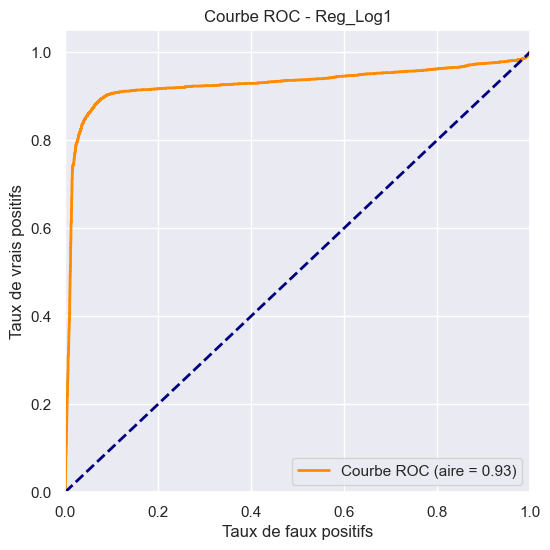

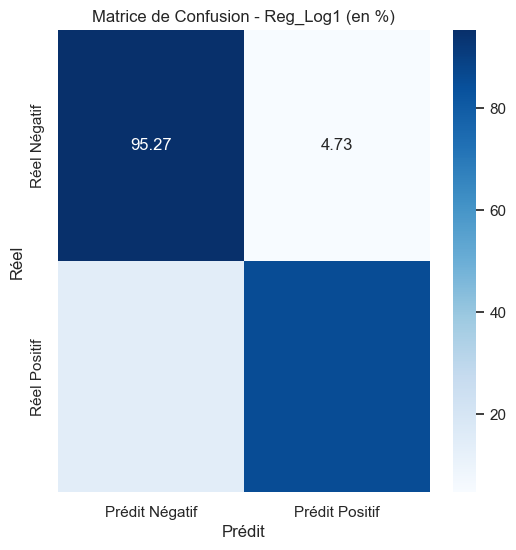

                      0
Model Scores   Reg_Log1
accuracy       0.918919
recall         0.855252
precision      0.905607
f1             0.879709
cross_entropy  0.336455
roc_auc        0.926713
cohen_kappa    0.818636


In [93]:
# Construction et évaluation le modèle
y_test, y_pred, y_prob = My_model(X, y, size=0.33)
metrics = Evaluation_Modele(y_test, y_pred, y_prob, "Reg_Log1")

# Afficher les métriques d'évaluation
print(metrics)

## Random Forest

### Construction du modèle Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42, n_estimators=100, 
                               criterion="entropy", max_depth=20 ) 
# Entraînement du modèle                              
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, random_state=42)

###  Évaluation du modèle

In [25]:
## Get an initial score
score = model.score(X_test, y_test)
# print the model score
print("In-test score: {:0.2%}".format(score))

In-test score: 94.33%


Prédiction du niveau d'engagement sur l'ensemble de test.

In [26]:
# Prédiction sur l'ensemble de test

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_prob[1:5: ]

array([0.98810257, 0.03864139, 0.96409306, 0.9662714 ])

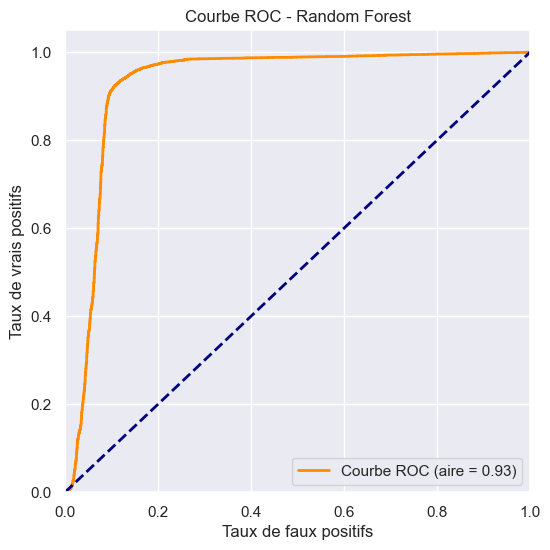

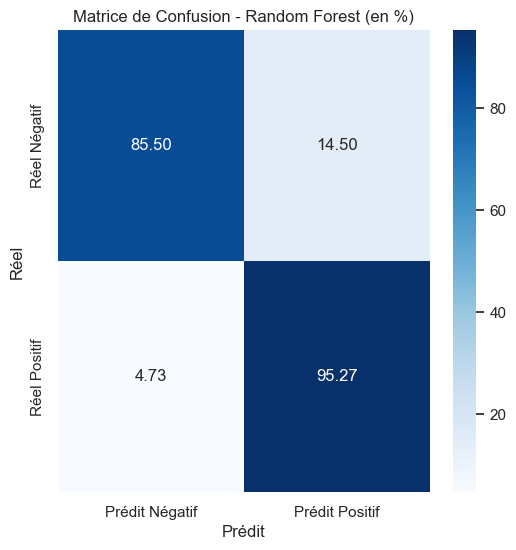

                           0
Model Scores   Random Forest
accuracy            0.918817
recall              0.952701
precision           0.925258
f1                  0.938779
cross_entropy       0.336454
roc_auc              0.92671
cohen_kappa         0.818395


In [71]:
# Évaluation du modèle
resultats = Evaluation_Modele(y_test, y_pred, y_prob, nom="Random Forest")
print(resultats)

In [28]:
# Prédiction sur l'ensemble des données
Predict_Proba = model.predict_proba(X)

pd.DataFrame(Predict_Proba[:,1],columns=["Proba Engagement"]).head()

,Proba Engagement
0,0.991564
1,0.964728
2,0.001111
3,0.977628
4,0.986087


Analyse de l'importance des différentes variables dans le modèle Random Forest pour comprendre quels facteurs influencent le plus le niveau d'engagement des joueurs.

In [29]:
# Importance des variables
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importance ranking:")
for i in range(X.shape[1]):
    print(f"{i+1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]})")

Feature importance ranking:
1. Feature AvgSessionDurationMinutes (0.3995702096916133)
2. Feature SessionsPerWeek (0.3655198985417943)
3. Feature PlayerLevel (0.0677515468826152)
4. Feature AchievementsUnlocked (0.06043309002982471)
5. Feature Age (0.0518541149680799)
6. Feature PlayTimeHours (0.04719178529841793)
7. Feature InGamePurchases (0.007679354587654805)


### Optimisation et réglage des hyperparamètres

Utilisation d'une validation croisée pour évaluer la robustesse du modèle.
Ajustement des hyperparamètres comme le nombre d'arbres, la profondeur maximale, et le nombre de variables à considérer à chaque division pour améliorer les performances du modèle.

In [31]:
from sklearn.model_selection import GridSearchCV

In [1]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Meilleurs hyperparamètres trouvés: {grid_search.best_params_}")
print(f"Meilleur accuracy trouvés: {grid_search.best_score_}")


Meilleurs hyperparamètres trouvés: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500}

Meilleur accuracy trouvés: 0.9453403667420247

## SVM

### Normalisation des données

SVM est sensible à l'échelle des données. Ainsi, il est crucial de normaliser les caractéristiques (features) avant d'entraîner le modèle.

In [29]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Construction du modèle SVM

SVM peut utiliser différents types de noyaux ('kernel') pour trouver le meilleur hyperplan de séparation entre les classes. L' un des noyaux les plus couramment utilisé est rbf.

Nous avous utilisé GridSearchCV pour trouver les meilleurs hyperparamètres pour le modèle SVM. Les hyperparamètres C (contrôle la régularisation) et gamma (influence le comportement du noyau) sont ajustés pour optimiser la performance du modèle.
Pour optimiser ce modèle, trois valeurs de C sont utilisées pour ajuster la régularisation, permettant de trouver un équilibre entre sous-ajustement et surajustement. Deux valeurs de gamma sont choisies pour tester l'influence des points de données sur la frontière de décision, permettant de contrôler la complexité du modèle. Le noyau rbf est sélectionné pour capturer les séparations non linéaires, maximisant ainsi les performances du modèle. Ces choix équilibrent l'exploration des hyperparamètres et l'efficacité de l'optimisation.

In [32]:
# Initialisation du modèle SVM
svm_model = SVC(probability=True, random_state=42)

# Définition de la grille de paramètres pour GridSearch
param_grid = {
    'C': [0.1, 1, 10],  
    'gamma': [0.1, 0.01],  
    'kernel': ['rbf']  # Utilisation d'un seul kernel (rbf), qui est souvent le plus performant
}

# Recherche des meilleurs hyperparamètres
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=2)
grid.fit(X_train_scaled, y_train)



Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  49.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  55.7s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.6min
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time= 1.3min
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  40.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=  37.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  49.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=  46.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  33.5s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=  37.6s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=  37.9s
[CV] END .......................C=10, gamma=0.01,

In [34]:
# Affichage des meilleurs paramètres
print(f"Meilleurs hyperparamètres trouvés: {grid.best_params_}")
print(f"Meilleur accuracy trouvés: {grid.best_score_}")

Meilleurs hyperparamètres trouvés: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Meilleur accuracy trouvés: 0.9430798628150378


### Évaluation du modèle avec les meilleurs hyperparamètres

Le modèle est évalué en utilisant les métriques standard telles que la précision, le rappel, et l'AUC ROC. La fonction Evaluation_Modele génère aussi des visualisations comme la courbe ROC et la matrice de confusion.

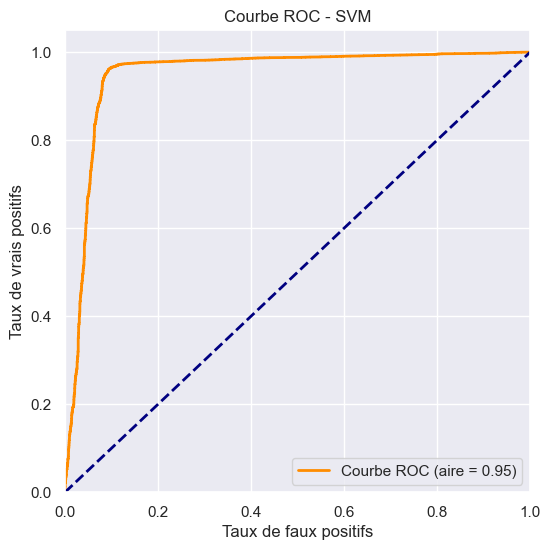

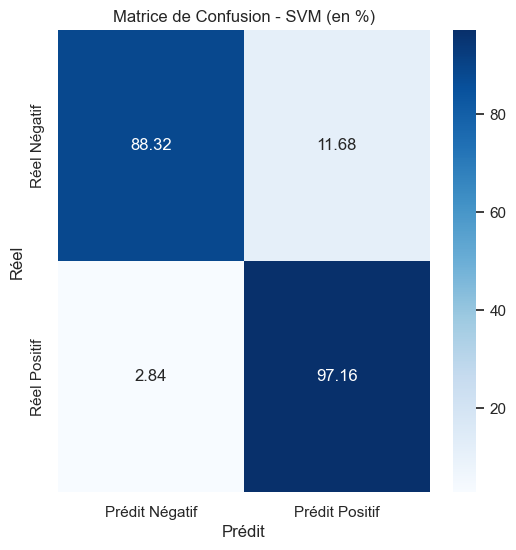

                      0
Model Scores        SVM
accuracy       0.940948
recall         0.971589
precision      0.940039
f1             0.955554
cross_entropy  0.257043
roc_auc        0.949087
cohen_kappa    0.867671


In [72]:
best_svm_model = grid.best_estimator_

# Prédiction sur l'ensemble de test
y_pred = best_svm_model.predict(X_test_scaled)
y_prob = best_svm_model.predict_proba(X_test_scaled)[:, 1] 

# Utilisation de la fonction d'évaluation
resultats_svm = Evaluation_Modele(y_test, y_pred, y_prob, nom="SVM")
print(resultats_svm)

## XGBoost

Nous avons utilisé XGBClassifier, qui est l'implémentation de XGBoost pour les problèmes de classification. Nous avons spécifié eval_metric='logloss' pour suivre la fonction de perte log-loss pendant l'entraînement, car elle est couramment utilisée pour les problèmes de classification binaire.

### Construction du modèle XGBoost

La grille de recherche (GridSearchCV) est utilisée pour trouver les meilleurs hyperparamètres, tels que n_estimators (le nombre d'arbres), max_depth (la profondeur maximale des arbres), et learning_rate (le taux d'apprentissage). Cette recherche est cruciale pour optimiser les performances du modèle.

Pour optimiser la recherche d'hyperparamètres dans XGBoost tout en accélérant l'opération, differentes valeurs sont attribuées aux hyperparametres . Le nombre d'estimations (n_estimators) est limité à 100 et 200 pour équilibrer la complexité et le temps de calcul. La profondeur maximale des arbres (max_depth) est restreinte à 3 et 5 pour capturer les relations non linéaires sans risquer le surajustement. Le taux d'apprentissage (learning_rate) est testé avec 0.01 et 0.1, offrant un compromis entre vitesse de convergence et précision. Les paramètres subsample et colsample_bytree sont fixés à 0.8, des valeurs standard qui réduisent le surajustement tout en maintenant la diversité entre les arbres. Enfin, gamma est testé avec 0 et 0.1 pour évaluer l'effet de la régularisation sur la complexité des arbres, évitant ainsi une complexité excessive tout en préservant les performances du modèle.

In [36]:
import xgboost as xgb
# Initialisation du modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Définition de la grille de paramètres pour GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],  
    'subsample': [0.8], 
    'colsample_bytree': [0.8],  
    'gamma': [0, 0.1], 
}

# Recherche des meilleurs hyperparamètres
grid_Xgboost = GridSearchCV(xgb_model, param_grid, refit=True, verbose=2, cv=5)
grid_Xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8]},
             verbose=2)

In [37]:
# Affichage des meilleurs paramètres
print(f"Meilleurs hyperparamètres trouvés: {grid_Xgboost.best_params_}")
print(f"Meilleur accuracy trouvés: {grid_Xgboost.best_score_}")

Meilleurs hyperparamètres trouvés: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Meilleur accuracy trouvés: 0.945491082642552


### Évaluation du modèle avec les meilleurs hyperparamètres

Le modèle optimisé est ensuite évalué à l'aide des métriques standard. La fonction Evaluation_Modele est alors utilisée pour calculer et afficher les métriques telles que la précision, le rappel, le score F1, et l'AUC ROC. Des visualisations comme la courbe ROC et la matrice de confusion sont également générées.

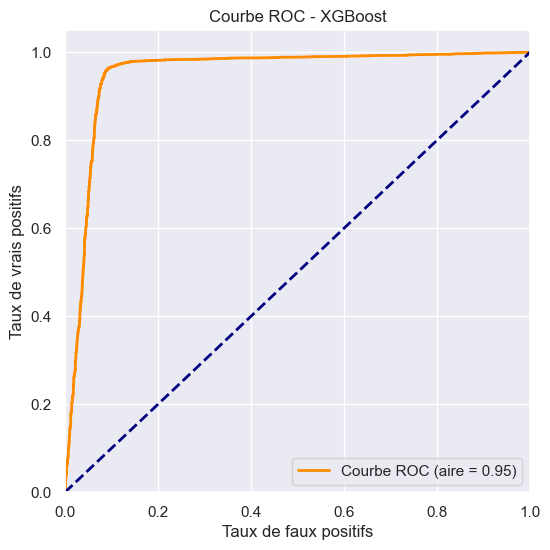

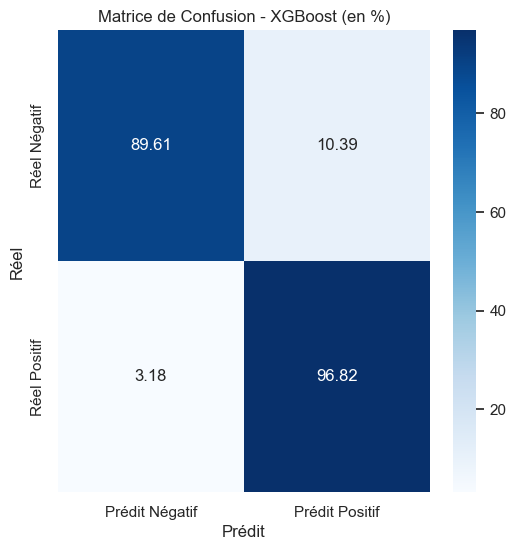

                      0
Model Scores    XGBoost
accuracy       0.943192
recall         0.968155
precision      0.946148
f1             0.957025
cross_entropy  0.207324
roc_auc         0.95085
cohen_kappa    0.873286


In [73]:
best_xgb_model = grid_Xgboost.best_estimator_

# Prédiction sur l'ensemble de test
y_pred = best_xgb_model.predict(X_test)
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]  

# Utilisation de la fonction d'évaluation
resultats_xgb = Evaluation_Modele(y_test, y_pred, y_prob, nom="XGBoost")
print(resultats_xgb)

#### **Conclusion:**

In [94]:
scores = {
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Cross-Entropy', 'ROC AUC', 'Cohen\'s Kappa'],
    'Reg_Log1': [0.918917, 0.952701, 0.925258, 0.938779, 0.336454, 0.92671, 0.818395],
    'Random Forest': [0.918817, 0.952701, 0.925258, 0.938779, 0.336454, 0.92671, 0.818395],
    'SVM': [0.940948, 0.971589, 0.940039, 0.955554, 0.257043, 0.949087, 0.867671],
    'XGBoost': [0.943192, 0.968155, 0.946148, 0.957025, 0.207324, 0.95085, 0.873286]
}

pd.DataFrame(scores)

,Metric,Reg_Log1,Random Forest,SVM,XGBoost
0,Accuracy,0.918917,0.918817,0.940948,0.943192
1,Recall,0.952701,0.952701,0.971589,0.968155
2,Precision,0.925258,0.925258,0.940039,0.946148
3,F1 Score,0.938779,0.938779,0.955554,0.957025
4,Cross-Entropy,0.336454,0.336454,0.257043,0.207324
5,ROC AUC,0.926710,0.926710,0.949087,0.950850
6,Cohen's Kappa,0.818395,0.818395,0.867671,0.873286


-------------------------------------------------------------------------------------------
Parmi les modèles comparés, `XGBoost` se démarque comme le meilleur classificateur, offrant des performances supérieures dans la plupart des métriques importantes, telles que *l'accuracy*, *la précision*, *le F1 score*, et le ROC AUC. Sa capacité à bien équilibrer précision et rappel, tout en maintenant une faible entropie croisée, en fait un choix robuste pour les tâches de classification.

Bien que SVM présente un excellent rappel, particulièrement utile dans les situations où détecter les vrais positifs est crucial, `XGBoost` reste globalement le plus performant.

En conclusion, `XGBoost` est recommandé comme le meilleur classificateur pour ce problème, offrant un équilibre optimal entre diverses métriques de performance essentielles.

In [107]:
X,y=DataModel(df_complet.columns[1:-1],df_complet,"EngagementLevel_Medium")
# Ajout d'une constante pour l'interception
X = sm.add_constant(X)

# Ajustement du modèle logistique
logit_model = sm.Logit(y, X)
result = logit_model.fit()

odds_ratios = np.exp(result.params)
print("\nOdds Ratios:")
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.336881
         Iterations 7

Odds Ratios:
const                        71391.523929
Age                              1.004937
PlayTimeHours                    0.994463
InGamePurchases                  0.935859
SessionsPerWeek                  0.653978
AvgSessionDurationMinutes        0.954400
PlayerLevel                      0.995877
AchievementsUnlocked             0.992292
Gender_Male                      0.998663
Location_Europe                  1.011890
Location_Other                   1.040273
Location_USA                     1.054677
GameGenre_RPG                    1.032188
GameGenre_Simulation             0.970661
GameGenre_Sports                 1.010786
GameGenre_Strategy               1.036040
GameDifficulty_Hard              0.973995
GameDifficulty_Medium            0.993412
dtype: float64


**Recommandation :** <br>
Les résultats des odds ratios indiquent que plusieurs variables ont des effets modestes sur la probabilité de l'événement étudié.
 Par exemple, l'âge et certaines localisations géographiques, comme les États-Unis, augmentent légèrement les chances de l'événement . Dans l'ensemble, ces variables montrent des effets relativement faibles sur l'événement, suggérant qu'aucune d'entre elles n'a un impact dominant.
